
# Moving Average Time Series

---
> Erick Eduardo Aguilar Hernández:
> * mat.ErickAguilar@ciencias.unam.mx
> * isc.ErickAguilar@gmail.com
---

#  Moving Average Model

___


The moving average model is another time series process parametric family with some differences from the $AR(p)$ model., the moving average series of order q with drift c $MA(q)$ is defined as:

$$
\begin{align*}
X_{t} &= \varepsilon_t +\psi_1 \varepsilon_{t-1} +  \psi_2 \varepsilon_{t-2} + ... +  \psi_q \varepsilon_{t-q} + c \\
X_{t} &= (1 +\psi_1 B +  \psi_2 B + ... +  \psi_q B^q)\varepsilon_t + c \\
X_{t} &= \Psi_q(B)\varepsilon_t + c \\
\end{align*}
$$

Where: 
* $\psi_{i}$: It's a real coefficient.
* $\varepsilon_t$: It's and uncorrelated normal variable $N(0,\sigma^2)$ at "time" $t-i$ for $1 \leq i \leq k$

There is another useful representation for the $MA(q)$ process, replacing $\psi_i=-\theta_i$:

$$
\begin{align*}
X_{t} &= \varepsilon_t  -\theta_1 \varepsilon_{t-1} -\theta_2 \varepsilon_{t-2} - ... - \theta_q \varepsilon_{t-q}+ c \\
X_{t} &= (1-\theta_1B-\theta_2B^2- ... - \theta_q B^q)\varepsilon_t+c\\
X_{t} &= \Theta_q(B)\varepsilon_t+c\\
\end{align*}
$$


##  MA(1) model
___


The MA(1) model it's the process given by the following recursion:

$$
X_t = \psi_1 \varepsilon_{t-1} + \varepsilon_t+c
$$


#### MA(1) model stationarity conditions
The $\{Xt\}$ process is always stationary.

**Mean**:
$$
\begin{align*}
    X_t &= \psi_1 \varepsilon_{t-1} + \varepsilon_t+c \\
    E[X_t] &= E[\psi_1 \varepsilon_{t-1} + \varepsilon_t+c] \\
    E[X_t] &= \psi_1 E[\varepsilon_{t-1}] + E[\varepsilon_t]+E[c] \\
    E[X_t] &= \psi_1[0]+[0]+E[c] \\
    E[X_t] &= c \\
\end{align*}
$$

**Variance**:
$$
\begin{align*}
    X_t &= \psi_1 \varepsilon_{t-1} + \varepsilon_t+c \\
    X_t -c &= \psi_1 \varepsilon_{t-1} + \varepsilon_t \\
    Z_t &= \psi_1 \varepsilon_{t-1} + \varepsilon_t \\
    Z_t^2 &= (\psi_1 \varepsilon_{t-1} + \varepsilon_t)(\psi_1 \varepsilon_{t-1} + \varepsilon_t ) \\
    Z_t^2 &=  \psi_1^2 \varepsilon_{t-1}^2+\psi_1 \varepsilon_{t-1}\varepsilon_t+\psi_1\varepsilon_t \\
    E[Z_t^2] &=  \psi_1^2 E[\varepsilon_{t-1}^2]+\psi_1 E[\varepsilon_{t-1}\varepsilon_t]+\psi_1E[\varepsilon_t \varepsilon_{t-1}] +E[\varepsilon_t^2]\\
    E[Z_t^2] &=  \psi_1^2\sigma^2 +\psi_1[0]+\psi_1[0] +\sigma^2\\
    V[X_t] &=  (1+\psi_1^2)\sigma^2\\
    V[X_t] &=  (1+\theta_1^2)\sigma^2\\
\end{align*}
$$

Note that the mean and variance always of the param values $\sigma^2, \psi_1$ and there is not restrictionto that params. That implies stationarity for every $\psi_1$

**Example:** MA(1) stationary process instance. 

In [1]:
run tsUtils.py

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('ggplot')

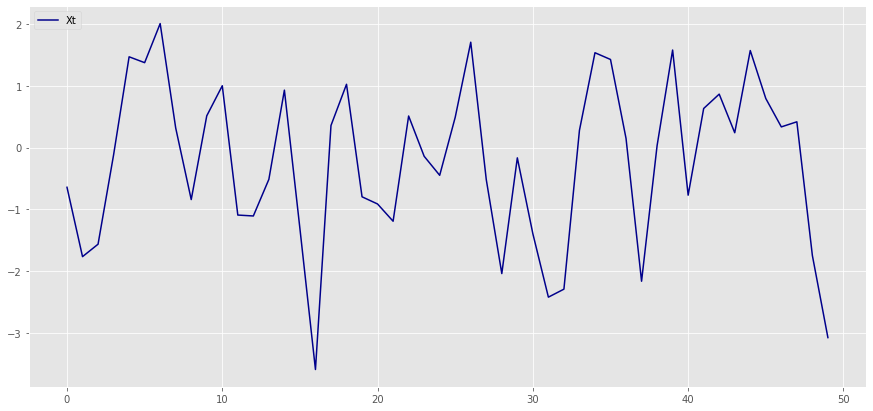

In [3]:
ma = np.array([0.8])
n = 500
lags=50
endog = 'Xt'

np.random.seed(5000)
Xt = sm.tsa.arma_generate_sample(np.r_[1, np.array([0, 0])],np.r_[1, ma],n)
ma_1_df = pd.DataFrame(Xt,columns=['Xt'])

plt.style.use('ggplot')
plotTimeSeries(ma_1_df[:50])

#### MA(1) Auto covariance and auto correlation functions.


Without loss of generality consider the centered moving average time series:

$$
X_t = \psi \varepsilon_{t-1} + \varepsilon_t
$$

**First autocovariance**:
$$
\begin{align*}
    X_t &= \psi_1 \varepsilon_{t-1} + \varepsilon_t\\
    X_tX_{t-1} &= (\psi_1 \varepsilon_{t-1} + \varepsilon_t)X_{t-1}\\
    X_tX_{t-1} &= \psi_1 \varepsilon_{t-1}X_{t-1} + \varepsilon_tX_{t-1}\\
    E[X_tX_{t-1}] &= \psi_1 E[\varepsilon_{t-1}X_{t-1}] + E[\varepsilon_tX_{t-1}]\\
    \gamma(1) &= \psi_1 E[\varepsilon_{t-1}X_{t-1}]+0\\
    &= \psi_1 E[\varepsilon_{t-1}(\varepsilon_{t-1}-\psi_1\varepsilon_{t-2})]\\
    &= \psi_1 E[\varepsilon_{t-1}\varepsilon_{t-1}-\psi_1\varepsilon_{t-1}\varepsilon_{t-2}]\\
    &= \psi_1 E[\varepsilon_{t-1}\varepsilon_{t-1}]-\psi_1 E[\varepsilon_{t-1}\varepsilon_{t-2}]\\
    &= \psi_1 E[\varepsilon_{t-1}\varepsilon_{t-1}]\\
    \gamma(1) &= \psi_1 \sigma^2\\
    \gamma(1) &= -\theta_1 \sigma^2\\
\end{align*}
$$

**K-th autocovariance**: for $k \geq 2$
$$
\begin{align*}
    X_t &= \psi_1 \varepsilon_{t-1} + \varepsilon_t\\
    X_tX_{t-k} &= (\psi_1 \varepsilon_{t-1} + \varepsilon_t)X_{t-k}\\
    X_tX_{t-k} &= \psi_1 \varepsilon_{t-1}X_{t-k} + \varepsilon_tX_{t-k}\\
    E[X_tX_{t-k}] &= \psi_1 E[\varepsilon_{t-1}X_{t-k}] + E[\varepsilon_tX_{t-k}]\\
    \gamma(k) &= \psi_1 E[\varepsilon_{t-1}X_{t-k}]+0\\
    &= \psi_1 E[\varepsilon_{t-1}(\varepsilon_{t-k}-\psi_1\varepsilon_{t-k-1})]\\
    &= \psi_1 E[\varepsilon_{t-1}\varepsilon_{t-k}-\psi_1\varepsilon_{t-1}\varepsilon_{t-k-1}]\\
    &= \psi_1 E[\varepsilon_{t-1}\varepsilon_{t-k}]-\psi_1 E[\varepsilon_{t-1}\varepsilon_{t-k-1}]\\
    &= \psi_1 (0)-0\\
    \gamma(k) &=0\\
\end{align*}
$$

**Auto covariance autocovariance**:

$$  
\gamma(k)=
\begin{cases}
\begin{align*}
(1+\theta_1^2)\sigma^2 \quad & k =0\\
-\theta_1 \sigma^2 \quad& k=1\\
0 \quad & k\geq2\\ 
\end{align*}
\end{cases}
$$

**Auto correlation autocovariance**:

$$  
\rho(k)=\frac{\gamma(k)}{\gamma(0)}=
\begin{cases}
\begin{align*}
1\quad & k =0\\
\frac{-\theta_1}{1+\theta_1^2} & k=1\\
0 \quad & k\geq2\\ 
\end{align*}
\end{cases}
$$

#### MA(1) Partial autocorrelation function.

$$
\begin{align*}
\phi_{11}&=\rho(1)\\
&=\frac{-\theta_1}{1+\theta_1^2}\\
&= \frac{-\theta_1}{1+\theta_1^2} \left(\frac{1-\theta_1^2}{1-\theta_1^2}\right) \\
&= \frac{-\theta_1^2(1-\theta_1^2)}{1-\theta_1^4}  \\
\phi_{22}&=
\frac{
    \begin{vmatrix}
        1 & \rho(1) \\
        \rho(1) & \rho(2)\\
    \end{vmatrix}
}{
    \begin{vmatrix}
        1 & \rho(1) \\
        \rho(1) & 1\\
    \end{vmatrix}
}\\
&= \frac{\rho(1)^2}{1-\rho(1)^2}\\
&= \frac{-\theta_1^2}{1+\theta_1^2+\theta_1^4} \\
&= \frac{-\theta_1^3(1-\theta_1^2)}{1-\theta_1^6}  \\
\phi_{33}&=
\frac{
    \begin{vmatrix}
        1 & \rho(1)  & \rho(1)\\
        \rho(1) & 1 & \rho(2)\\
        \rho(2) & \rho(1)  & \rho(3)\\
    \end{vmatrix}
}{
    \begin{vmatrix}
        1 & \rho(1)  & \rho(2)\\
        \rho(1) & 1 & \rho(1)\\
        \rho(2) & \rho(1)  & 1\\
    \end{vmatrix}
}\\
&= \frac{\rho(1)^3}{1-2\rho(1)^2}\\
&= \frac{-\theta_1^3}{1+\theta_1^2+\theta_1^4+\theta_1^6} \\
&= \frac{-\theta_1^3(1-\theta_1^2)}{1-\theta_1^8}  \\
\vdots\\
\phi_{kk}&=
\frac{
    \begin{vmatrix}
        1 & \rho(1)  & \rho(2) & \dots & \rho(k-2)  & \rho(1)\\
        \rho(1) & 1 & \rho(1) & \dots & \rho(k-3)  & \rho(2)\\
        \vdots & \vdots & \vdots &  & \vdots & \vdots \\
        \rho(k-1) & \rho(k-2)  & \rho(k-3)  & \vdots& \rho(1) & \rho(k) \\
    \end{vmatrix}
}{
    \begin{vmatrix}
        1 & \rho(1)  & \rho(2) & \dots & \rho(k-2)  & \rho(k-1)\\
        \rho(1) & 1 & \rho(1) & \dots & \rho(k-3)  & \rho(k-2)\\
        \vdots & \vdots & \vdots &  & \vdots & \vdots \\
        \rho(k-1) & \rho(k-2)  & \rho(k-3)  & \vdots& \rho(1) & 1 \\
    \end{vmatrix}
}\\
\phi_{kk}&= \frac{-\theta_1^k(1-\theta_1^2)}{1-\theta_1^{2(k+1)}}  \\
\end{align*}
$$

**Example:** Sample autocorrelations and partial autocorrelations using python for the MA(1) time series.

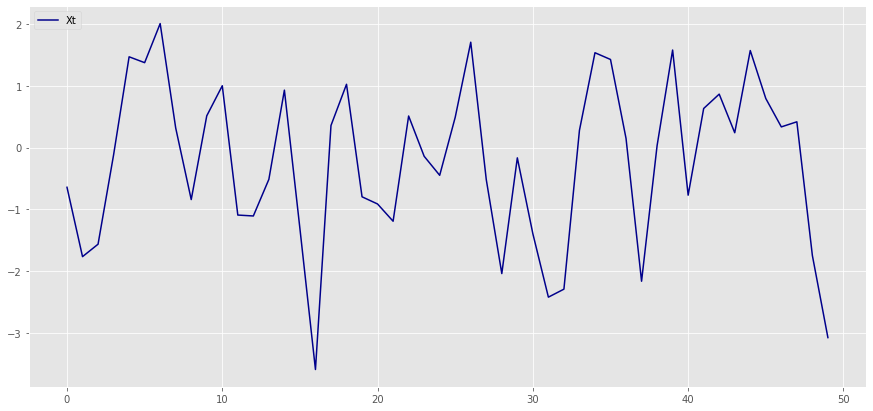

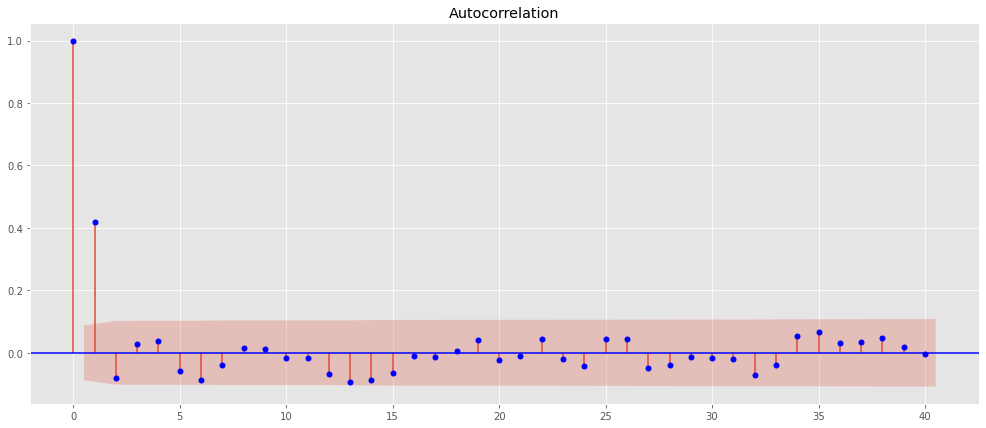

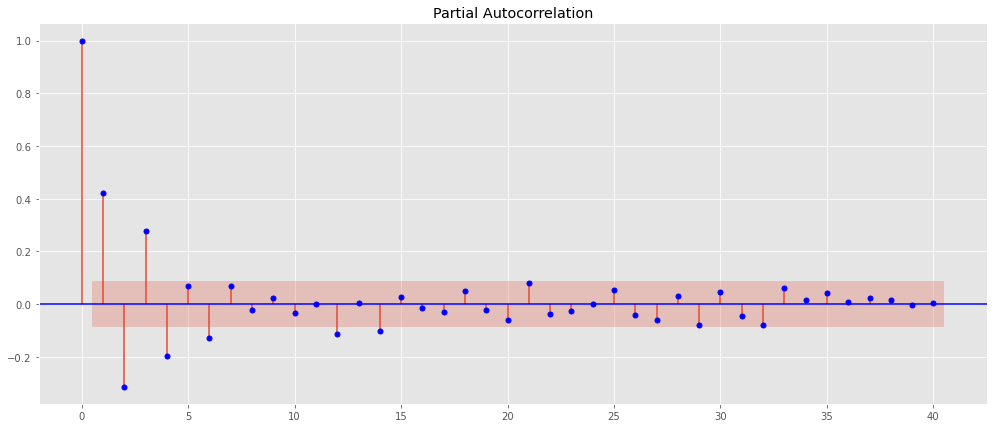

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

n = 500
lags = 40
ma = [1, 0.9]
np.random.seed(5000)
Xt = sm.tsa.arma_generate_sample([1, 0.0],ma,nsample=n)
ma_2_df = pd.DataFrame(Xt,columns=['Xt'])

plt.style.use('ggplot')
plotTimeSeries(ma_1_df[:50])
plt.figsize=(15,10)
fig = plot_acf(ma_1_df[[endog]],lags=lags,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
fig = plot_pacf(ma_1_df[[endog]],lags=lags,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
plt.show()

In [5]:
from statsmodels.tsa.arima_model import ARMA 

endog = 'Xt'
train_fraction = 0.97
k = int(len(ma_1_df)*train_fraction)

time_series_train = ma_1_df[:k]
time_series_test = ma_1_df[k:]

ma_1_model = ARMA(ma_1_df[endog],order=(0,1)).fit(trend='nc')
ma_1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     Xt   No. Observations:                  500
Model:                     ARMA(0, 1)   Log Likelihood                -736.981
Method:                       css-mle   S.D. of innovations              1.056
Date:                Mon, 22 Feb 2021   AIC                           1477.963
Time:                        18:07:22   BIC                           1486.392
Sample:                             0   HQIC                          1481.270
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.Xt       0.7889      0.029     26.806      0.000       0.731       0.847
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.2676           +0.0000j            1.2676            0.5000
-----------------------------------------------------------------------------
"""

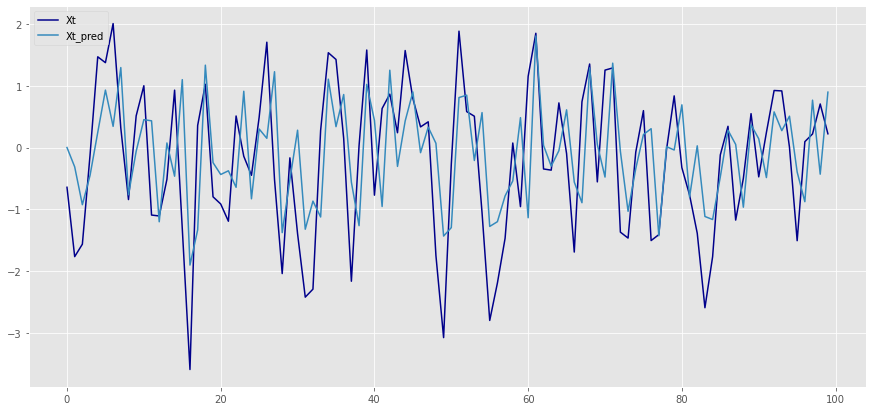

In [6]:
ma_1_df[endog+'_pred'] = ma_1_model.predict(start=0,end=len(ma_1_df))
plotTimeSeries(ma_1_df[:100])

####  AR(1) and MA(1) duality
___

There is an important relationship between the AR(1) and the MA(1) models called duality, this relationship consist in to express una of the processe as the other one. Consider the AR(1) process $X_t$, from the AR(1) stationarity conditions recall the expression:

$$
\begin{align*}
    X_t &= \phi_1^t X_0 +  \phi_1^{t-1} \varepsilon_1 + \phi_1^{t-2} \varepsilon_2 + \dots + \varepsilon_t\\
\end{align*}
$$

If we assume t to be large, since $|\phi_1| < 1 $ we can represent the series as a function of all the past innovations, with weights that decrease geometricall, other possibility is to assume that the series starts in the infinite past. Observe that the coefficients of the innovations are precisely the coefficients of the simple autocorrelation function.

$$
\begin{align*}
    X_t &= \phi_1^t X_0 +  \phi_1^{t-1} \varepsilon_1 + \phi_1^{t-2} \varepsilon_2 + \dots \\
    X_t &= \sum_{t=0}^{\infty} \phi_1^{j} \varepsilon_{t-j}\\
\end{align*}
$$

This representation is denoted as the infinite order moving average, $MA(\infty)$, of the process, In conclussion $AR(1) = MA(\infty)$.

For the inverse case, consider the $MA(1)$ process:


$$
\begin{align*}
    X_t &= -\theta_1 \varepsilon_{t-1} + \varepsilon_t\\
    X_{t-1} &= -\theta_1 \varepsilon_{t-2} + \varepsilon_{t-1}\\
    X_{t-2} &= -\theta_1 \varepsilon_{t-3} + \varepsilon_{t-2}\\
    \vdots\\
    X_{t-k} &= -\theta_1 \varepsilon_{t-k-1} + \varepsilon_{t-k}\\
    \varepsilon_{t-1} &= X_{t-1} + \theta_1 \varepsilon_{t-2}\\
    \varepsilon_{t-2} &= X_{t-2} + \theta_1 \varepsilon_{t-3}\\
    \vdots\\
    \varepsilon_{t-k} &= X_{t-k} + \theta_1 \varepsilon_{t-k-1}\\
    X_t &= -\theta_1 (X_{t-1} + \theta_1 \varepsilon_{t-2}) + \varepsilon_t\\
    X_t &= -\theta_1 X_{t-1} - \theta_1^2 \varepsilon_{t-2} + \varepsilon_t\\
    X_t &= -\theta_1 X_{t-1} - \theta_1^2 (X_{t-2} + \theta_1 \varepsilon_{t-3}) + \varepsilon_t\\
    X_t &= -\theta_1 X_{t-1} - \theta_1^2 X_{t-2} - \theta_1^3 \varepsilon_{t-3} + \varepsilon_t\\
    \vdots\\
    X_t &= -\theta_1 X_{t-1} - \theta_1^2 X_{t-2} - \theta_1^3 \varepsilon_{t-3} - \dots - \theta_1^k \varepsilon_{t-k-1} + \varepsilon_t\\
    \vdots\\
    X_t &= (-\theta_1 X_{t-1} - \theta_1^2 X_{t-2} - \theta_1^3 \varepsilon_{t-3} - \dots )+ \varepsilon_t\\
    X_t &= -\sum_{i=1}^{\infty} \theta^i X_{t-i}+ \varepsilon_t\\
\end{align*}
$$

Assuming that the process begins in the infinite past. This equation represents the $MA(1)$ process as $AR(\infty)$.  In conclussion $MA(1) = AR(\infty)$.


####  MA(1) invertibility.
___

For some $\theta \in \mathbb{R}$ consider the following first-order MA processes:

$$
\begin{align*}
    X_t &= \varepsilon_t-\theta_1\varepsilon_{t-1} \\
    Y_t &= \varepsilon_t-\frac{1}{\theta_1}\varepsilon_{t-1} \\
\end{align*}
$$

Notice that both processes have the same auto correlation function. So both the models have identical mean and autocovariance structures. Hence they will provide identical fits and predictions. This nonuniqueness, or lack of identifiability, is problematic since there are multiple “correct” models.

How is this issue resolved? What is done is to recall to its dual autoregressive form, if we check this situation it did not happen with the AR models.

$$
\begin{align*}
    X_t &= \varepsilon_t-\theta_1\varepsilon_{t-1} \\
    X_t &= -\sum_{i=1}^{\infty} \theta^i X_{t-i}+ \varepsilon_t\\
    \varepsilon_t &= X_t + \sum_{i=1}^{\infty} (\theta_1^i B^i) X_t\\
\end{align*}
$$

Notice that the only condition for the series to converge forces that $|\theta_1| < 1$, in that case:

$$
\begin{align*}
    \varepsilon_t &= X_t + \sum_{i=1}^{\infty} (\theta_1^i B^i) X_t\\
    \varepsilon_t &= (\theta_1^0 B^0) X_t + \sum_{i=1}^{\infty} (\theta_1^i B^i) X_t\\
    \varepsilon_t &= \left(\sum_{i=0}^{\infty} (\theta_1 B)^i\right) X_t\\
    \varepsilon_t &= \left(\frac{1}{1-\theta_1B}\right) X_t\\
    \varepsilon_t &= \left[\frac{1}{\Theta_1(B)}\right] X_t\\
\end{align*}
$$

The last respresentation of the $MA(1)$ process is valid ince $|\theta_1| < 1$, Obervse that $\frac{1}{\Theta_1(B)}$ is the inverse operator of $\Theta_1(B)$, due to that representation we said that $X_t$ is invertible. Observe that if the is invertible (restricted to the valid invertible parametral space of $\theta_1$ in this case $(-1,1)$) then there is no more than one auto correlation function asociated to $X_t$. 

In conclussion if the value of $\theta$ is larger than 1 in magnitude, then we may as well consider the second model for which coefficient associated with is $1/\theta$ whose magnitude is less than 1. Similarly if the moving average coefficient $1/\theta$ of the second model is larger than 1 in magnitude, then we may decide to use the first model for which the coefficient would be smaller than 1 in magnitude. Thus we can always choose a model whose moving average coefficient is no larger than 1 in magnitude and this is what is done in practice.

##  MA(2) model
___

The MA(2) model it's the process given by the following recursion:

$$
X_t = \psi_1 \varepsilon_{t-1}+\psi_2 \varepsilon_{t-2}+ \varepsilon_t+c
$$

#### MA(2) model stationarity conditions
The $\{Xt\}$ process is always stationary.

**Mean**:
$$
\begin{align*}
    X_t &= \psi_1 \varepsilon_{t-1}+\psi_2 \varepsilon_{t-2}+ \varepsilon_t+c \\
    E[X_t] &= E[\psi_1 \varepsilon_{t-1}+\psi_2 \varepsilon_{t-2}+ \varepsilon_t+c] \\
    E[X_t] &= \psi_1 E[\varepsilon_{t-1}]+\psi_2 E[\varepsilon_{t-2}] + E[\varepsilon_t]+E[c] \\
    E[X_t] &= \psi_1[0]+\psi_2[0]+[0]+E[c] \\
    E[X_t] &= c \\
\end{align*}
$$

**Variance**:
$$
\begin{align*}
    X_t &= \psi_1 \varepsilon_{t-1}+\psi_2 \varepsilon_{t-2}+ \varepsilon_t+c  \\
    X_t -c &= \psi_1 \varepsilon_{t-1}+\psi_2 \varepsilon_{t-2}+ \varepsilon_t \\
    Z_t &= \psi_1 \varepsilon_{t-1}+\psi_2 \varepsilon_{t-2} + \varepsilon_t\\
    Z_t^2 &= (\psi_1 \varepsilon_{t-1}+\psi_2 \varepsilon_{t-2}+ \varepsilon_t)(\psi_1 \varepsilon_{t-1}+\psi_2 \varepsilon_{t-2}+\varepsilon_t) \\
    Z_t^2 &=  \psi_1^2\varepsilon_{t-1}^2+\psi_2^2 \varepsilon_{t-2}^2+\varepsilon_{t}^2+2\psi_1\psi_2 \varepsilon_{t-1}\varepsilon_{t-2}+2\psi_1\varepsilon_{t-1}\varepsilon_{t}+2\psi_2\varepsilon_{t}\varepsilon_{t-2} \\
    E[Z_t^2] &=  \psi_1^2E[\varepsilon_{t-1}^2]+\psi_2^2 E[\varepsilon_{t-2}^2]+E[\varepsilon_{t}^2]+2\psi_1\psi_2 E[\varepsilon_{t-1}\varepsilon_{t-2}]+2\psi_1E[\varepsilon_{t-1}\varepsilon_{t}]+2\psi_2E[\varepsilon_{t}\varepsilon_{t-2}]\\
    E[Z_t^2] &=  \psi_1^2\sigma^2+\psi_2^2\sigma^2+\sigma^2++\psi_1\psi_2[0]+\psi_1[0]+\psi_2[0]\\
    V[X_t] &=  (\psi_1^2+\psi_2^2+1)\sigma^2\\
    V[X_t] &=  (\theta_1^2+\theta_2^2+1)\sigma^2\\
\end{align*}
$$

**Example:** MA(2) stationary process instance. 

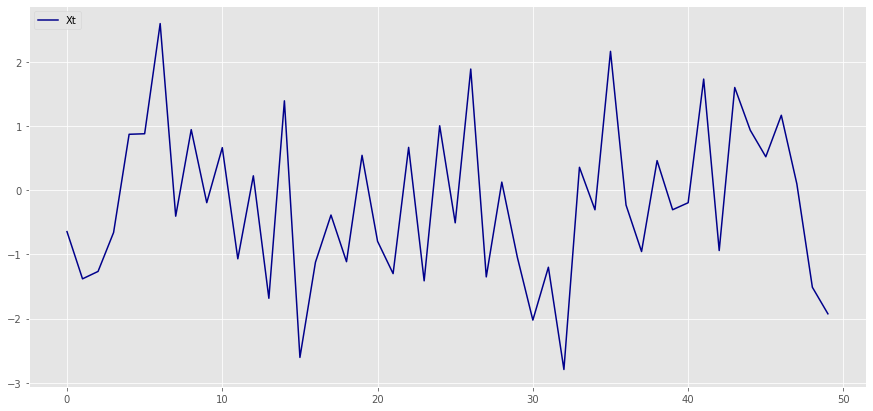

In [7]:
import statsmodels.api as sm
import numpy as np

n = 500
lags = 40
ma = [1, 0.2, 0.7]
np.random.seed(5000)
Xt = sm.tsa.arma_generate_sample([1, 0.0],ma,nsample=n)
ma_2_df = pd.DataFrame(Xt,columns=['Xt'])

plt.style.use('ggplot')
plotTimeSeries(ma_2_df[:50])

#### MA(2) Auto covariance and auto correlation functions.

Without loss of generality consider the centered moving average time series with out drift param:

$$
X_t = \psi_1 \varepsilon_{t-1} + \psi_2 \varepsilon_{t-2} + \varepsilon_t
$$

**First autocovariance**:
$$
\begin{align*}
    X_t &= \psi_1 \varepsilon_{t-1} + \psi_2 \varepsilon_{t-2} + \varepsilon_t\\
    X_tX_{t-1} &= (\psi_1 \varepsilon_{t-1} + \psi_2 \varepsilon_{t-2} + \varepsilon_t)X_{t-1}\\
    X_tX_{t-1} &= \psi_1 \varepsilon_{t-1}X_{t-1} + \psi_2 \varepsilon_{t-2}X_{t-1} + \varepsilon_tX_{t-1}\\
    E[X_tX_{t-1}] &= \psi_1 E[\varepsilon_{t-1}X_{t-1}] + \psi_2 E[\varepsilon_{t-2}X_{t-1}] + E[\varepsilon_tX_{t-1}]\\
    \gamma(1) &= \psi_1 E[\varepsilon_{t-1}(\psi_1 \varepsilon_{t-2} + \psi_2 \varepsilon_{t-3} + \varepsilon_{t-1})] + \psi_2 E[\varepsilon_{t-2}(\psi_1 \varepsilon_{t-2} + \psi_2 \varepsilon_{t-3} + \varepsilon_{t-1})] + 0\\
    &= \psi_1^2 E[\varepsilon_{t-1}\varepsilon_{t-2}] + \psi_1 \psi_2 E[\varepsilon_{t-1}  \varepsilon_{t-3}] + \psi_1 E[\varepsilon_{t-1}\varepsilon_{t-1}] + \psi_2 \psi_1 E[\varepsilon_{t-2}\varepsilon_{t-2}] + \psi_2 \psi_2 E[\varepsilon_{t-2}\varepsilon_{t-3}] + \psi_2 E[\varepsilon_{t-2}\varepsilon_{t-1}]\\
    &= \psi_1^2 (0) + \psi_1 \psi_2 (0) + \psi_1 V[\varepsilon_{t-1}] + \psi_2 \psi_1 V[\varepsilon_{t-2}] + \psi_2 \psi_2 (0) + \psi_2(0)\\
    &=\psi_1 V[\varepsilon_{t-1}] + \psi_2 \psi_1 V[\varepsilon_{t-2}]\\
    &=\psi_1 \sigma^2 + \psi_2 \psi_1 \sigma^2 \\
\gamma(1)&=(\psi_1 + \psi_2 \psi_1) \sigma^2 \\
\gamma(1)&=(\theta_2 \theta_1-\theta_1) \sigma^2 \\
\end{align*}
$$

**Second autocovariance**:

$$
\begin{align*}
    X_t &= \psi_1 \varepsilon_{t-1} + \psi_2 \varepsilon_{t-2} + \varepsilon_t\\
    X_tX_{t-2} &= (\psi_1 \varepsilon_{t-1} + \psi_2 \varepsilon_{t-2} + \varepsilon_t)X_{t-2}\\
    X_tX_{t-2} &= \psi_1 \varepsilon_{t-1}X_{t-2} + \psi_2 \varepsilon_{t-2}X_{t-2} + \varepsilon_tX_{t-2}\\
    E[X_tX_{t-2}] &= \psi_1 E[\varepsilon_{t-1}X_{t-2}] + \psi_2 E[\varepsilon_{t-2}X_{t-2}] + E[\varepsilon_tX_{t-2}]\\
    \gamma(2) &= \psi_1 E[\varepsilon_{t-1}(\psi_1 \varepsilon_{t-3} + \psi_2 \varepsilon_{t-4} + \varepsilon_{t-2})] + \psi_2 E[\varepsilon_{t-2}(\psi_1 \varepsilon_{t-3} + \psi_2 \varepsilon_{t-4} + \varepsilon_{t-2})]+0\\
    &= \psi_1^2 E[\varepsilon_{t-1}\varepsilon_{t-3}] + \psi_1 \psi_2 E[\varepsilon_{t-1}  \varepsilon_{t-4}] + \psi_1 E[\varepsilon_{t-1}\varepsilon_{t-2}] + \psi_2 \psi_1 E[\varepsilon_{t-2}\varepsilon_{t-3}] + \psi_2 \psi_2 E[\varepsilon_{t-2}\varepsilon_{t-4}] + \psi_2 E[\varepsilon_{t-2}\varepsilon_{t-2}]\\
    &= \psi_1^2 (0) + \psi_1 \psi_2 (0) + \psi_1 (0) + \psi_2 \psi_1 (0) + \psi_2 \psi_2 (0) + \psi_2 V[\varepsilon_{t-2}]\\
\gamma(2)&=\psi_2 \sigma^2 \\
\gamma(2)&=-\theta_2 \sigma^2 \\
\end{align*}
$$

**K-th autocovariance**: for $k \geq 3$
$$
\begin{align*}
    X_t &= \psi_1 \varepsilon_{t-1} + \psi_2 \varepsilon_{t-2} + \varepsilon_t\\
    X_tX_{t-k} &= (\psi_1 \varepsilon_{t-1} + \psi_2 \varepsilon_{t-2} + \varepsilon_t)X_{t-k}\\
    X_tX_{t-k} &= \psi_1 \varepsilon_{t-1}X_{t-k} + \psi_2 \varepsilon_{t-2}X_{t-k} + \varepsilon_tX_{t-k}\\
    E[X_tX_{t-k}] &= \psi_1 E[\varepsilon_{t-1}X_{t-k}] + \psi_2 E[\varepsilon_{t-2}X_{t-k}] + E[\varepsilon_tX_{t-k}]\\
    \gamma(k) &= \psi_1 E[\varepsilon_{t-1}(\psi_1 \varepsilon_{t-k-1} + \psi_2 \varepsilon_{t-k-2} + \varepsilon_{t-k})] + \psi_2 E[\varepsilon_{t-2}(\psi_1 \varepsilon_{t-k-1} + \psi_2 \varepsilon_{t-k-2} + \varepsilon_{t-k})]+0\\
    &= \psi_1^2 E[\varepsilon_{t-1}\varepsilon_{t-k-1}] + \psi_1 \psi_2 E[\varepsilon_{t-1}  \varepsilon_{t-k-2}] + \psi_1 E[\varepsilon_{t-1}\varepsilon_{t-k}] + \psi_2 \psi_1 E[\varepsilon_{t-2}\varepsilon_{t-k-1}] + \psi_2 \psi_2 E[\varepsilon_{t-2}\varepsilon_{t-k-2}] + \psi_2 E[\varepsilon_{t-2}\varepsilon_{t-k}]\\
    &= \psi_1^2 (0) + \psi_1 \psi_2 (0) + \psi_1 (0) + \psi_2 \psi_1 (0) + \psi_2 \psi_2 (0) + \psi_2 (0)\\
    \gamma(k) &=0\\
\end{align*}
$$

**Auto covariance autocovariance**:

$$  
\gamma(k)=
\begin{cases}
\begin{align*}
(\psi_1^2+\psi_2^2+1)\sigma^2 &\quad  k =0\\
(\psi_1 + \psi_2 \psi_1) \sigma^2 &\quad  k=1\\
\psi_2 \sigma^2 \quad &\quad  k=2\\
0 \quad &\quad  k\geq 3\\ 
\end{align*}
\end{cases}
$$

$$  
\gamma(k)=
\begin{cases}
\begin{align*}
(\theta_1^2+\theta_2^2+1)\sigma^2 &\quad  k =0\\
(\theta_2 \theta_1-\theta_1) \sigma^2 &\quad  k=1\\
-\theta_2 \sigma^2 \quad &\quad  k=2\\
0 \quad &\quad  k\geq 3\\ 
\end{align*}
\end{cases}
$$

**Auto correlation autocovariance**:

$$  
\rho(k)=\frac{\gamma(k)}{\gamma(0)}=
\begin{cases}
\begin{align*}
1\quad & k =0\\
\frac{(\psi_1 + \psi_2 \psi_1)}{(\psi_1^2+\psi_2^2+1)}\quad & k=1\\
\frac{\psi_2}{(\psi_1^2+\psi_2^2+1)}\quad & k=2\\
0 \quad & k\geq 3\\ 
\end{align*}
\end{cases}
$$

$$  
\rho(k)=\frac{\gamma(k)}{\gamma(0)}=
\begin{cases}
\begin{align*}
1\quad & k =0\\
\frac{(\theta_2 \theta_1-\theta_1)}{(\theta_1^2+\theta_2^2+1)}\quad & k=1\\
\frac{-\theta_2}{(\theta_1^2+\theta_2^2+1)}\quad & k=2\\
0 \quad & k\geq 3\\ 
\end{align*}
\end{cases}
$$

#### MA(2) Partial autocorrelation function.

$$
\begin{align*}
\phi_{11}&=\rho(1)\\
\phi_{22}&=\frac{\rho(2)-\rho(1)^2}{1-\rho(1)^2}\\
\phi_{33}&=
\frac{
    \begin{vmatrix}
        1 & \rho(1)  & \rho(1)\\
        \rho(1) & 1 & \rho(2)\\
        \rho(2) & \rho(1)  & \rho(3)\\
    \end{vmatrix}
}{
    \begin{vmatrix}
        1 & \rho(1)  & \rho(2)\\
        \rho(1) & 1 & \rho(1)\\
        \rho(2) & \rho(1)  & 1\\
    \end{vmatrix}
}\\
\phi_{33}&=\frac{\rho(1)^3-\rho(1)\rho(2)(2-\rho(2))}{1-\rho(2)^2-2\rho(1)^2(1-\rho(2))}\\
&\vdots\\
\end{align*}
$$

**Example:** Sample autocorrelations and partial autocorrelations using python for the MA(2) time series.

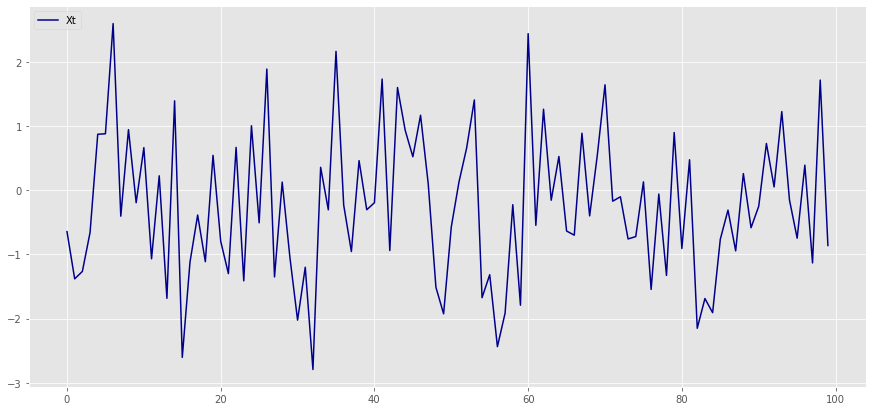

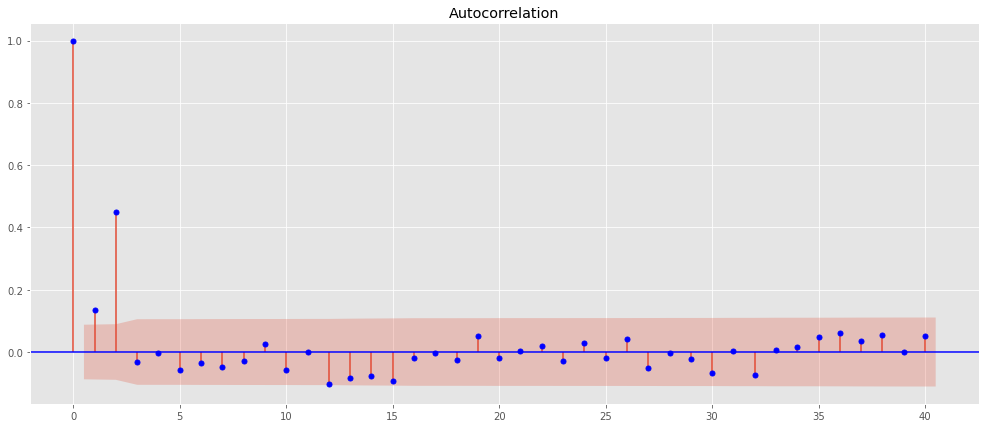

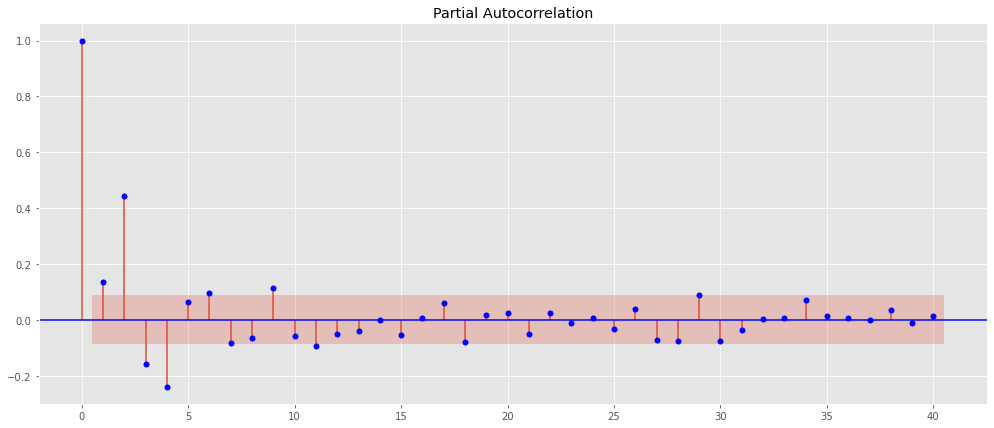

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

n = 500
lags = 40
ma = [1, 0.2, 0.7]
np.random.seed(5000)
Xt = sm.tsa.arma_generate_sample([1, 0.0],ma,nsample=n)
ma_2_df = pd.DataFrame(Xt,columns=['Xt'])

plt.style.use('ggplot')
plotTimeSeries(ma_2_df[:100])
plt.figsize=(15,10)
fig = plot_acf(ma_2_df[[endog]],lags=lags,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
fig = plot_pacf(ma_2_df[[endog]],lags=lags,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
plt.show()

In [9]:
from statsmodels.tsa.arima_model import ARMA 

endog = 'Xt'
train_fraction = 0.97
k = int(len(ma_2_df)*train_fraction)

time_series_train = ma_2_df[:k]
time_series_test = ma_2_df[k:]

ma_2_model = ARMA(time_series_train[endog],order=(0,2)).fit(trend='nc')
ma_2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     Xt   No. Observations:                  485
Model:                     ARMA(0, 2)   Log Likelihood                -713.326
Method:                       css-mle   S.D. of innovations              1.052
Date:                Mon, 22 Feb 2021   AIC                           1432.651
Time:                        18:07:23   BIC                           1445.204
Sample:                             0   HQIC                          1437.583
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.Xt       0.1516      0.036      4.224      0.000       0.081       0.222
ma.L2.Xt       0.6225      0.036     17.198      0.000       0.552       0.693
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.1217           -1.2616j            1.2674           -0.2653
MA.2           -0.1217           +1.2616j            1.2674            0.2653
-----------------------------------------------------------------------------
"""

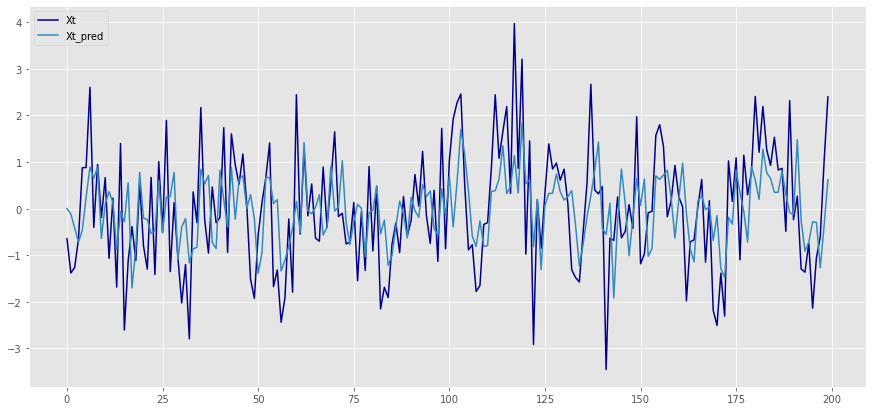

In [10]:
ma_2_df[endog+'_pred'] = ma_2_model.predict(start=0,end=len(ma_2_df))
plotTimeSeries(ma_2_df[:200])

####  AR(1) and MA(2) duality
___

For some $(\theta_1, \theta_2) \in \mathbb{R}^2$ consider the following second-order MA processes:

$$
\begin{align*}
X_t &= \psi_1 \varepsilon_{t-1} + \psi_2 \varepsilon_{t-2} + \varepsilon_t \\
X_{t} &= \varepsilon_t  -\theta_1 \varepsilon_{t-1} -\theta_2 \varepsilon_{t-2}  \\
X_{t} &= (1-\theta_1B-\theta_2B^2)\varepsilon_t \\
X_t &= \Theta_2^{-1}(B)\varepsilon_t\\
\end{align*}
$$


For this constructions its necesary to the fact that the inverse of a polynomial function could be expressed as an infinite series, so the idea is try to derive a series such that: $\Theta_2^{-1}(B)=\sum_{i=0}^\infty C_iB^i$ and:

$$
\begin{align*}
1&=\Theta_2^{-1}(B)\left(1-\theta_1B-\theta_2B^2\right)\\
&=\left(\sum_{i=0}^\infty C_iB^i\right) \left(1-\theta_1B-\theta_2B^2\right)\\
&=\sum_{i=0}^\infty C_iB^{i}-\sum_{i=0}^\infty \theta_1 C_iB^{i+1}-\sum_{i=0}^\infty \theta_2 C_iB^{i+2} \\
&=(1+C_1B^1+C_2B^2+C_3B^3+\dots)+(-\theta_1B^1-\theta_1C_1B^2-\theta_1C_2B^3-\dots)+(-\theta_2B^2-\theta_2C_1B^3-\dots) \\
1&=1+(C_1-\theta_1)B+(C_2-\theta_1C_1-\theta_2)B^2+(C_3-C_2\theta_1-C_1\theta_2)B^3+\dots\\
\end{align*}
$$

From this series the following system equations is derived:
$$
\begin{cases}
\begin{align*}
C_1-\theta_1 =0 &\implies  C_1=\theta_1\\
C_2-\theta_1C_1-\theta_2 =0&\implies  C_2 =C_1\theta_1+\theta_2=\theta_1^2+\theta_2\\
C_3-C_2\theta_1-C_1\theta_2=0 &\implies  C_3 = C_2\theta_1+C_1\theta_2\\
\vdots\\
C_k-C_{k-1}\theta_1-C_{k-2}\theta_2=0 &\implies  C_k = C_{k-1}\theta_1+C_{k-2}\theta_2\\
\vdots\\
\end{align*}
\end{cases}
$$

Finally
$$
\begin{align*}
X_t &= \Theta_2^{-1}(B)\varepsilon_t\\
X_t &= \left(\sum_{i=0}^\infty C_iB^i\right)\varepsilon_t\\
\psi_1 \varepsilon_{t-1} + \psi_2 \varepsilon_{t-2} + \varepsilon_t  &= \varepsilon_t+C_1\varepsilon_{t-1}+C_2\varepsilon_{t-2}+C_3\varepsilon_{t-3}+\dots\\
\end{align*}
$$

That proves that the Moving Averate Process of order 2 could be expressed as an infinite auto regresive model and also provides a general method to obtain the coeficients, notice if $\theta_2=0$ we have for $C_i=\theta_1^i$

$$
\begin{align*}
X_t &= \frac{1}{1-\theta_1B}\varepsilon_t\\
X_t &= \left(\sum_{i=0}^\infty C_iB^i\right)\varepsilon_t\\
X_t &= \varepsilon_t+C_1\varepsilon_{t-1}+C_2\varepsilon_{t-2}+C_3\varepsilon_{t-3}+\dots\\
X_t &= \varepsilon_t+\theta_1\varepsilon_{t-1}+\theta_1^2\varepsilon_{t-2}+\theta_3^2\varepsilon_{t-3}+\dots\\
\end{align*}
$$


####  MA(2) invertibility.
___

For the MA(2) AR infinity representation we used the exitense of $\Theta_2^{-1}(B)$ but this series expansion is only valid if the complex roots of $\Theta_2(B)$ lies outside the unit circle because in the oposite case the AR representation will not be stationary. For the second order moving average model:

$$
X_t = \varepsilon_t -\theta_1 \varepsilon_{t-1}-\theta_2\varepsilon_{t-2} \\
$$

$X_t$ will be an invertible MA(2) process if only if:

$$  
\begin{cases}
\theta_1+\theta_2 < 1 \\
\theta_2-\theta_1 < 1\\
\left|\theta_2\right| < 1\\ 
\end{cases}
$$


The proof if analogous to the AR(2) stationary conditions

## MA(q) model
___

For the autoregresive model of order p, the model its given by:

$$
\begin{align*}
X_{t} &= \varepsilon_t  -\theta_1 \varepsilon_{t-1} -\theta_2 \varepsilon_{t-2} - ... - \theta_q \varepsilon_{t-q}+ c \\
X_{t} &= (1-\theta_1B-\theta_2B^2- ... - \theta_q B^q)\varepsilon_t+c\\
X_{t} &= \Theta_q(B)\varepsilon_t+c\\
\end{align*}
$$

An MA(q) is always stationary, as it is a sum of stationary processes. We say that the process is invertible if the roots of the operator $\Theta_q(B)=0$ are, in modulus, greater than the unit. 

The MA(q) model has the follwing autocorrelation and autocovariance functions:
$$
\begin{align*}
\gamma(k) &= 
\begin{cases}
(1+\theta_1^2+\dots+\theta_q^2)\sigma^2 \quad k=0 \\
(-\theta_k+\theta_1 \theta_{k+1} + \dots + \theta_{q-k}\theta_{q})\sigma^2 \quad k=1, \dots, q \\
0 \quad k > q\\ 
\end{cases}\\
\rho(k) &= \frac{\sum_{i=0}^q \theta_i \theta_{k+1}}{\sum_{i=0}^q\theta_i^2}
\end{align*}
$$


To compute the partial autocorrelation function of an MA(q) we express the process as an $AR(\infty)$ using $\Theta_q^{-1}(B) = C(B)$ where $C(B)=1-C_1B-C_2B-\dots$ and the coefficients of $C(B)$ are obtained imposing $\Theta_q^{-1}(B)C(B)=1$. We say that the process is invertible if all the roots of $\Theta_q(B)=0$ lie outside the unit circle. Then the series $C(B)$ is convergent.

**Example:** Sample autocorrelations and partial autocorrelations using python for the MA(4) time series.

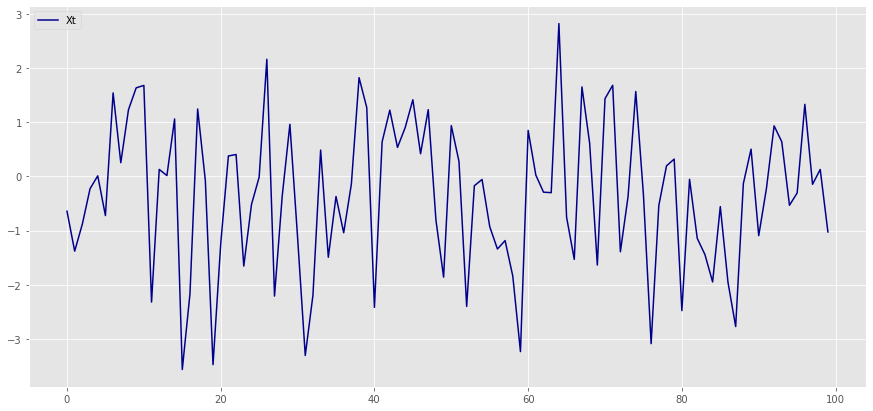

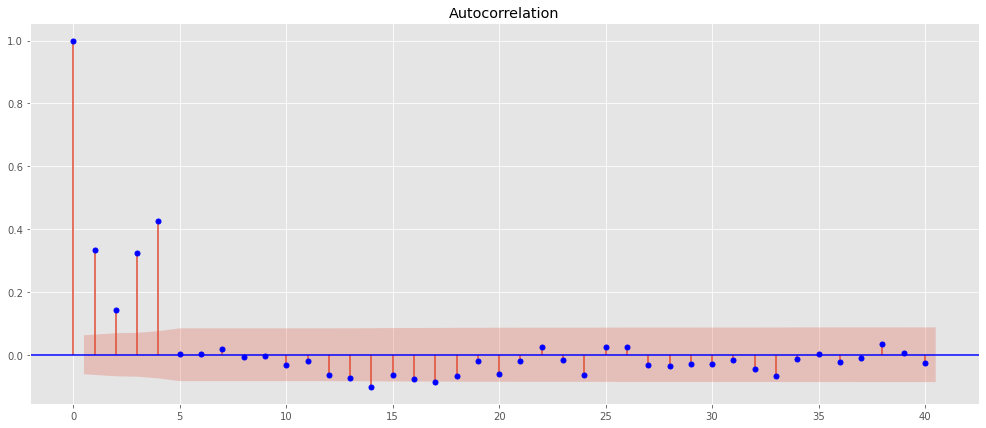

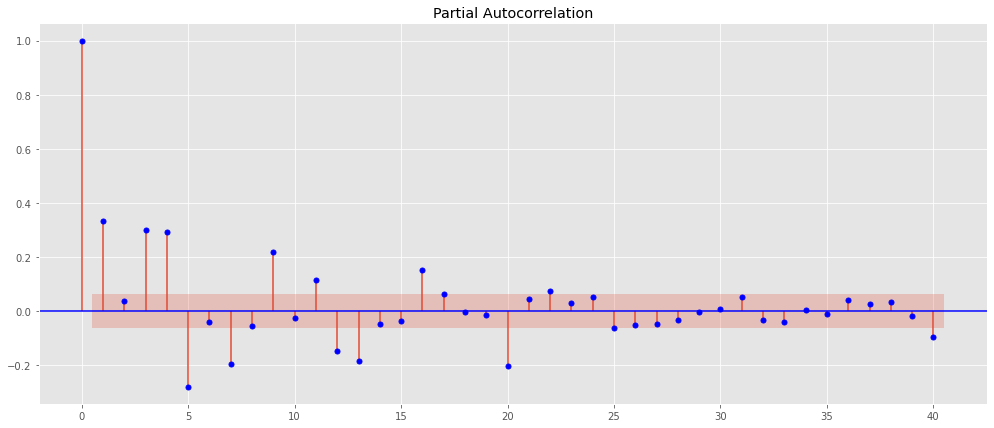

In [11]:
n = 1000
lags = 40
ma = [1, 0.2, 0.1, 0.5, 0.9]
np.random.seed(5000)
Xt = sm.tsa.arma_generate_sample([1, 0.0],ma,nsample=n,)
ma_4_df = pd.DataFrame(Xt,columns=['Xt'])

plt.style.use('ggplot')
plotTimeSeries(ma_4_df[:100])
plt.figsize=(15,10)
fig = plot_acf(ma_4_df[[endog]],lags=lags,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
fig = plot_pacf(ma_4_df[[endog]],lags=lags,c='b')
fig.set_figwidth(17)
fig.set_figheight(7)
plt.show()

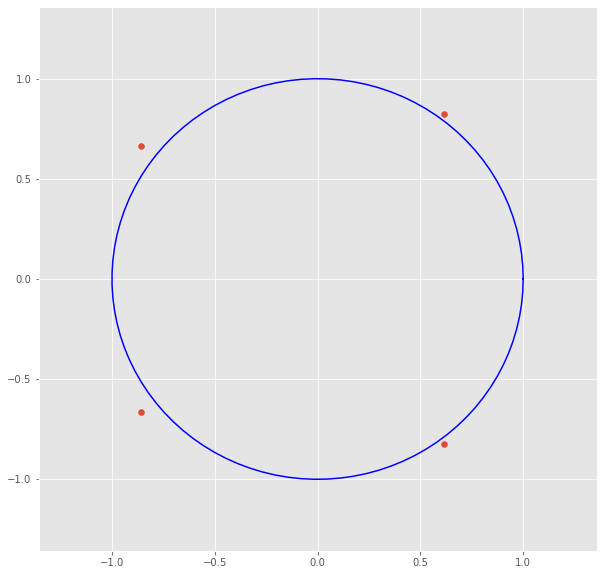

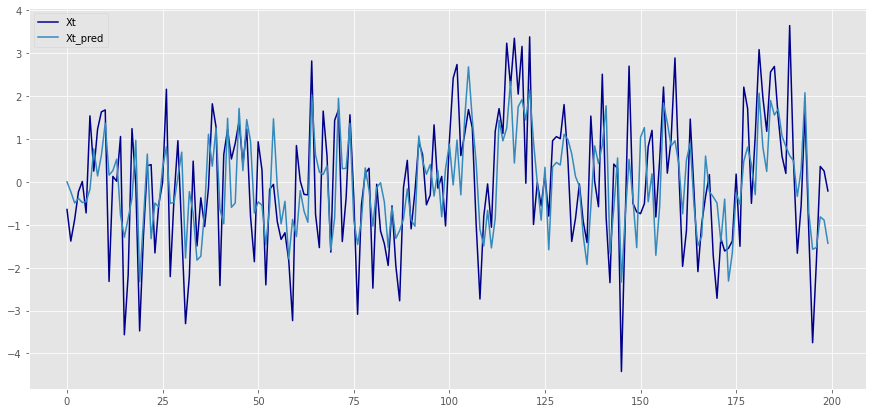

In [12]:
from statsmodels.tsa.arima_model import ARMA 

endog = 'Xt'
train_fraction = 0.97
k = int(len(ma_4_df)*train_fraction)

time_series_train = ma_4_df[:k]
time_series_test = ma_4_df[k:]

ma_4_model = ARMA(time_series_train[endog],order=(0,4)).fit(trend='nc')
ma_4_model.summary()
plot_ma_q_roots(ma_4_model)

ma_4_df[endog+'_pred'] = ma_4_model.predict(start=0,end=len(ma_4_df))
plotTimeSeries(ma_4_df[:200])